# Tutorial - Graphs with Julia

The goal is not to be extensive. But showcase some of the functionalities in the [Julia Graphs project](https://github.com/JuliaGraphs).

This Notebook uses weighted graphs, since this encompass simple graphs, and is usually more common then directed graphs.

In [260]:
using LightGraphs, GraphPlot, SimpleWeightedGraphs, LinearAlgebra, DataFrames, Random, CSV, Colors
ENV["COLUMNS"] = 2000;

First, let's import the data_example.csv file. Suppose that each column represents a person, and each line represents an attribute.

We then intend to create a graph to analyze the similarities between each person, by creating an edge when they share an attribute.

In [261]:
Random.seed!(7)
df = DataFrame(rand([0,1],10,20));

## Creating the first graph

The first step is to create the graph (object), by choosing the number of nodes that compose it.

In [262]:
g = SimpleWeightedGraph(ncol(df))

{20, 0} undirected simple Int64 graph with Float64 weights

Next we add the edges that connect the nodes. For our dataset, an edge must be added each time two nodes share an attribute,
which means that we add an edge when both columns have a 1 in at least one similar row. For example, the first and second columns
both have 1's in the first row, hence, we create an edge. Also, we set the weight of the edge
equal to the number of similar attributes between columns.

In [263]:
ew = Int[]
pairings = [] 
for i in 1:ncol(df), j in i+1:ncol(df) # iterate over all combinations of columns
    w = dot(df[!, i], df[!, j])        # calculate how many times (i,j) occurs
    if w > 0
        push!(ew, w)
        add_edge!(g, i, j, w)
        push!(pairings,[i,j])
    end
end

## Visualizing the Graph
The GraphPlot.jl package has implemented really easy to use functions for plotting your graph. Below we show
some of it's functionalities.

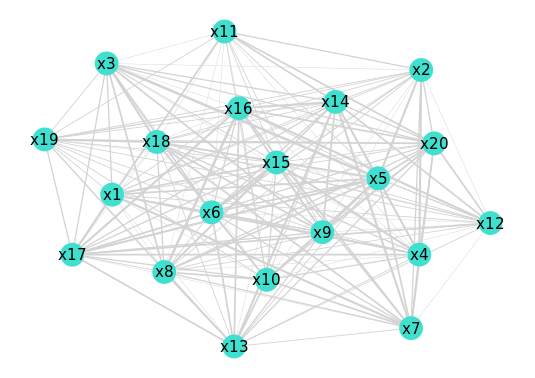

In [258]:
gplot(g,nodelabel=names(df),edgelinewidth=ew)

Changing the layout. Besides the "circular_layout", more layouts can be found [here](https://github.com/JuliaGraphs/GraphPlot.jl).

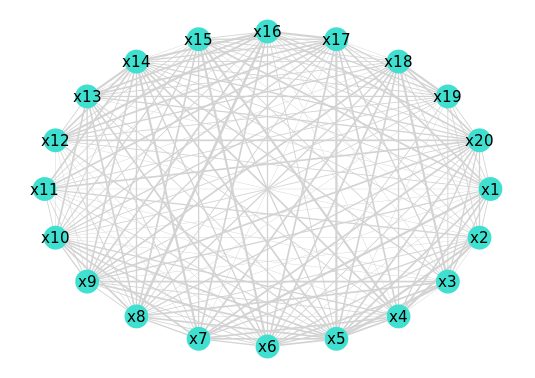

In [254]:
gplot(g,nodelabel=names(df),edgelinewidth=ew,layout=circular_layout)

Dealing with colors is not always quite direct. The documentation suggests using the Colors.jl package. Below we show how to calculate
the betweenness centrality metric ([more examples of centrality metric here](https://juliagraphs.org/LightGraphs.jl/stable/centrality/))
and to use it for coloring the nodes.

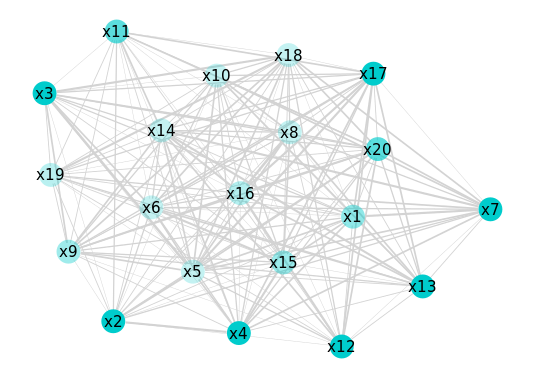

In [264]:
centrality = betweenness_centrality(g,normalize=false).+1
alphas = centrality./maximum(centrality).*10
nodefillc = [RGBA(0.0,0.8,0.8,i) for i in alphas]
gplot(g,nodelabel=names(df),edgelinewidth=ew,nodefillc=nodefillc)

### Minimum-Spanning Tree

Finally, we end this tutorial by visualizing the Minimum-Spanning Tree for this graph.

In [256]:
g_mst = SimpleWeightedGraph(ncol(df))
for i in kruskal_mst(g,minimize=false)
    add_edge!(g_mst,i.src,i.dst,i.weight)
end

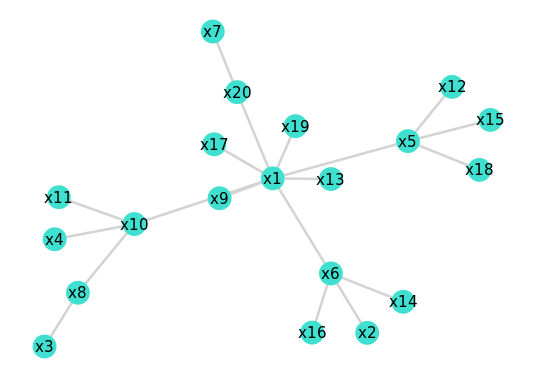

In [257]:
gplot(g_mst,nodelabel=names(df))